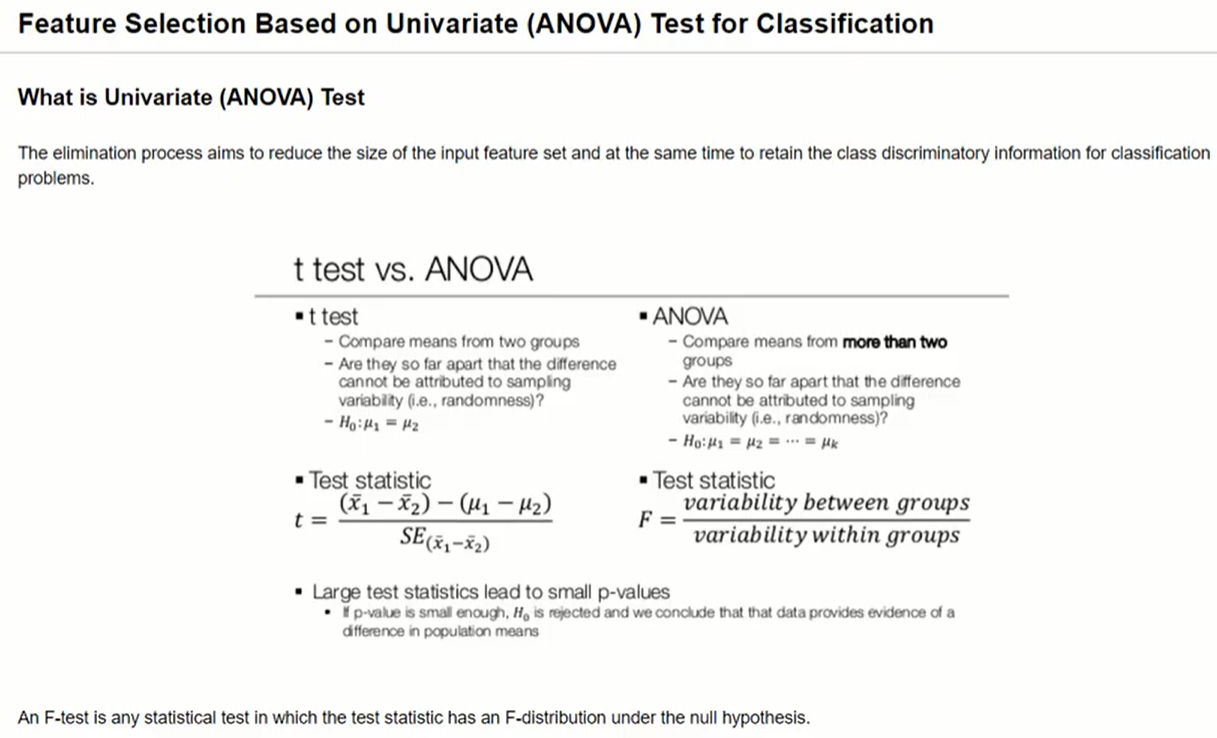

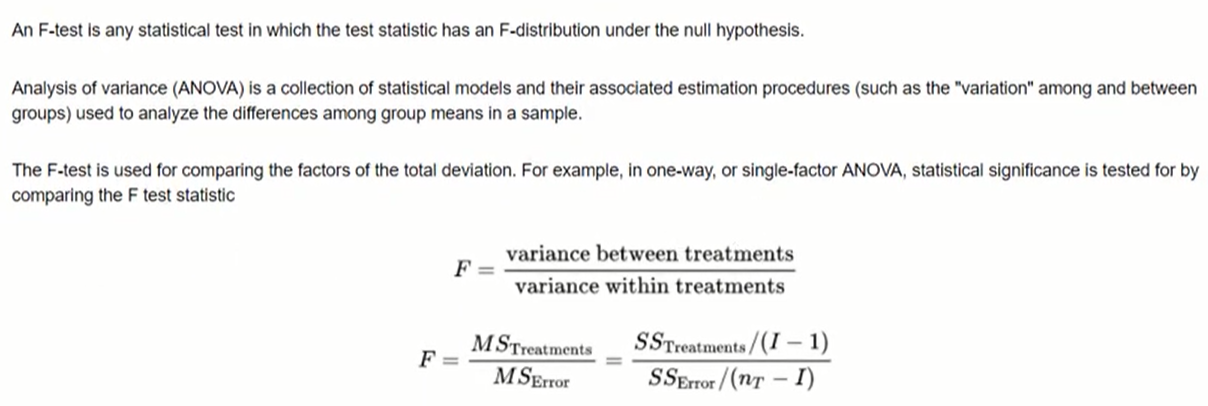

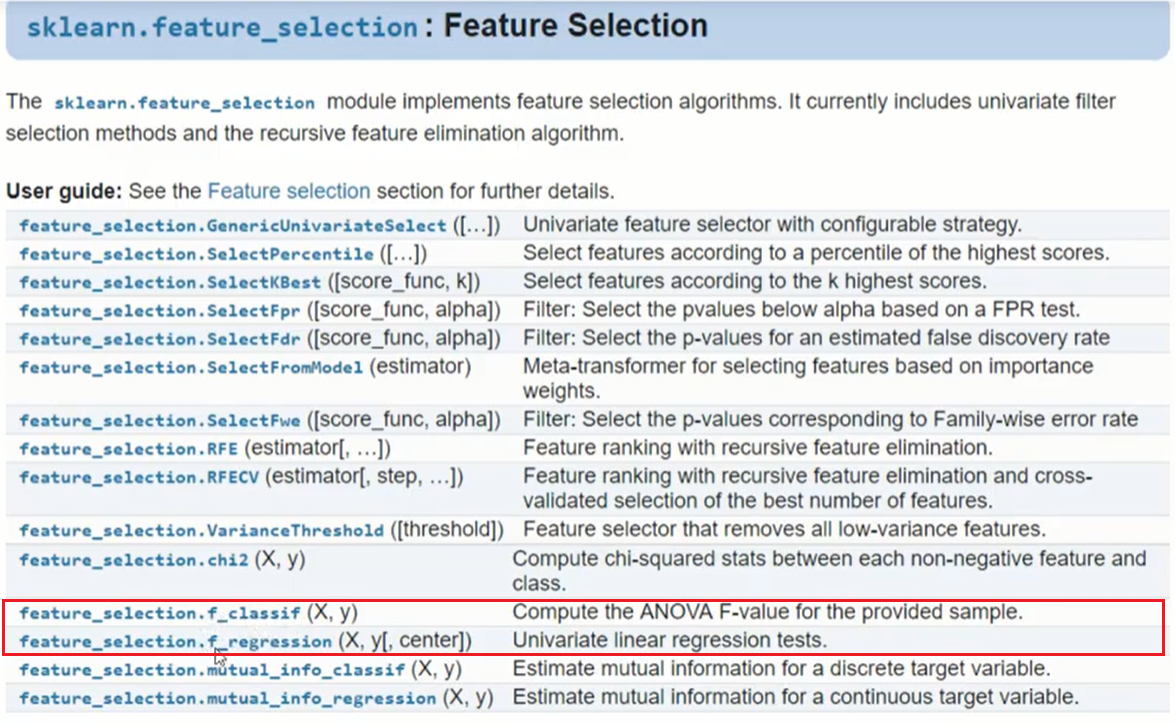

## 1. Classification Problem

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [3]:
data = pd.read_csv('C:/Users/dell/Downloads/Data-Files-for-Feature-Selection-master/Data-Files-for-Feature-Selection-master/santander-train.csv', nrows=20000)

In [4]:
X = data.drop(['TARGET'], axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

## Remove constant, quasi constant and duplicate features

### 1. Remove constant and quasi constant Features

In [9]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
## Apply transform on training dataset to avoid overfitting and to remove constant features
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [10]:
X_train_filter.shape, X_test_filter.shape, X_train.shape

((16000, 245), (4000, 245), (16000, 370))

### 2. Remove duplicate features

In [11]:
# Transpose(T) the latest dataset -> convert to nparray
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [12]:
# COnvert nparray to pandas dataframe
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [13]:
# Check no of duplicate features
X_train_T.duplicated().sum()

18

In [14]:
duplicated_features = X_train_T.duplicated() # get duplicated features
features_to_keep = [not index for index in duplicated_features] # get not duplicated features

In [15]:
# Reverse transpose the features data
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [16]:
X_train_unique.shape, X_test_unique.shape, X_train.shape

((16000, 227), (4000, 227), (16000, 370))

## 1. Classification Problem

In [17]:
sel = f_classif(X_train_unique, y_train)
sel

(array([3.42911520e-01, 1.22929093e+00, 1.61291330e+02, 4.01025132e-01,
        8.37661151e-01, 2.39279390e-03, 4.41633351e-02, 1.36337510e-01,
        1.84647123e+00, 2.03640367e+00, 7.98057954e-03, 1.14063993e+00,
        6.32266614e-03, 1.55626237e+01, 1.53553790e+01, 1.28615978e+01,
        1.61834746e+01, 1.59638013e+01, 1.21977511e+01, 9.03776687e-02,
        1.00443179e+00, 1.53946148e+01, 2.50428951e+02, 2.98696944e+01,
        1.06266841e+01, 2.63630437e+01, 1.66417611e+01, 3.13699473e+01,
        2.47256550e+01, 2.60021376e+01, 3.26742018e+01, 9.94259060e+00,
        1.48208220e+01, 1.50040146e+01, 1.34739830e+01, 7.03118653e+00,
        1.36234772e+01, 7.95962134e+00, 3.15161070e+02, 1.79631284e+00,
        1.66910747e+00, 1.21138302e+01, 1.10928892e+01, 1.00443179e+00,
        2.31851572e+00, 8.93973153e+01, 7.53868668e+00, 2.38490562e+02,
        2.98696944e+01, 1.06266841e+01, 2.61694409e+01, 1.66053267e+01,
        2.93013259e+01, 2.44433356e+01, 2.60021376e+01, 5.596238

In [18]:
p_values = pd.Series(sel[1])
p_values.index = X_train_unique.columns
p_values.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

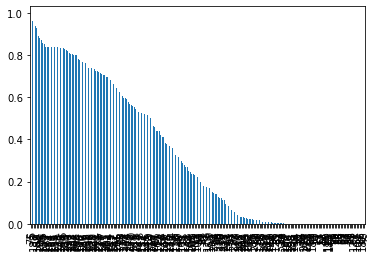

In [19]:
p_values.plot.bar()

In [20]:
# get only p_values < 0.05
p_values = p_values[p_values<0.05]

In [21]:
X_train_p = X_train_unique[p_values.index]
X_test_p = X_test_unique[p_values.index]

In [23]:
X_train_p.shape, X_test_p.shape, X_train.shape

((16000, 88), (4000, 88), (16000, 370))

## Build ML model and compare the performance of the selected features

In [25]:
# Function to calculate random forest ML accuracy
def run_random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy on test set")
    print(accuracy_score(y_test, y_pred))

In [26]:
# Call random forest on cleaned selected features dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train_p, X_test_p, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")


Accuracy on test set
0.9525
Time: 2.4595789909362793


In [27]:
# Call random forest on origional dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train, X_test, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

Accuracy on test set
0.9585
Time: 3.6349923610687256


## 2. Regression Problem -> Watch video